In [5]:
import qiskit

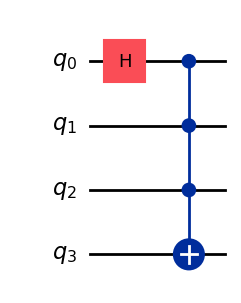

In [6]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
 
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0, 1, 2, 3])
qc.draw("mpl")

In [8]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [11]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [13]:
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

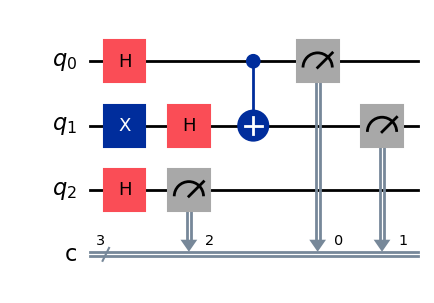

In [15]:
# Matplotlib drawing
circuit.draw(output="mpl")

In [19]:
from qiskit import QuantumRegister, ClassicalRegister
 
# Draw a new circuit with barriers and more registers
q_a = QuantumRegister(3, name="a")
q_b = QuantumRegister(5, name="b")
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)
 
circuit = QuantumCircuit(q_a, q_b, c_a, c_b)
circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

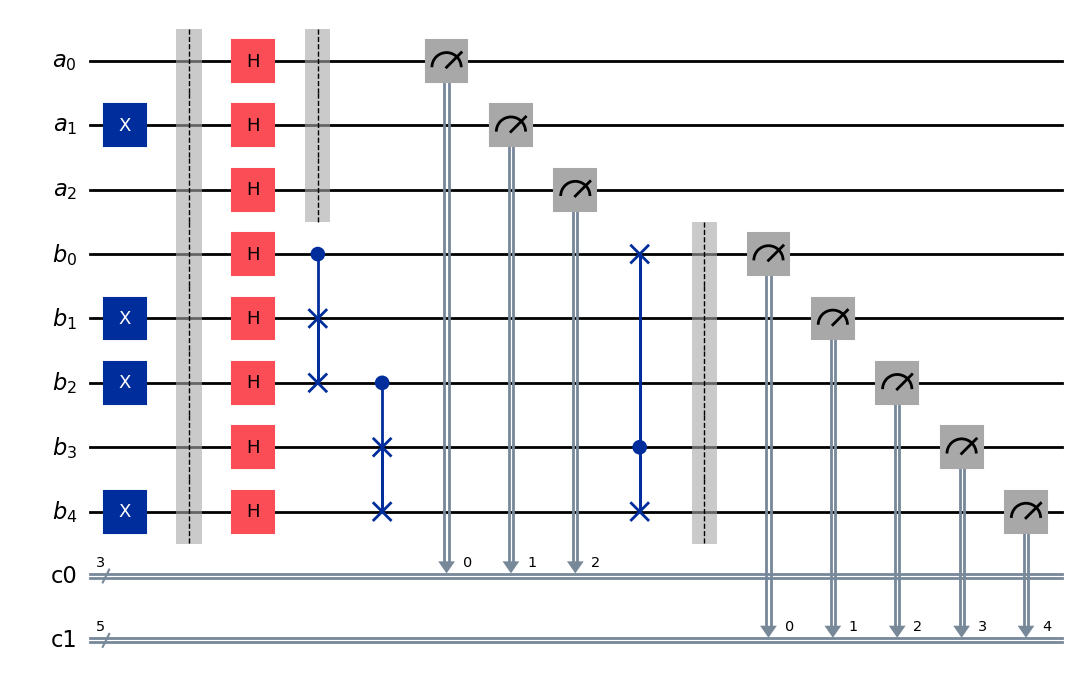

In [21]:
# Draw the circuit
circuit.draw(output="mpl")

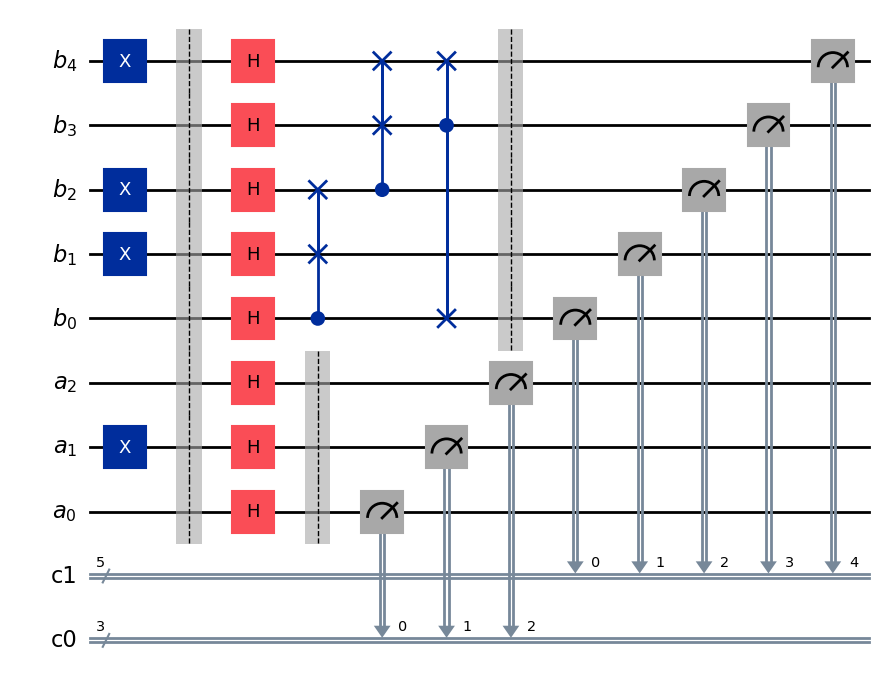

In [23]:
# Draw the circuit with reversed bit order
circuit.draw(output="mpl", reverse_bits=True)

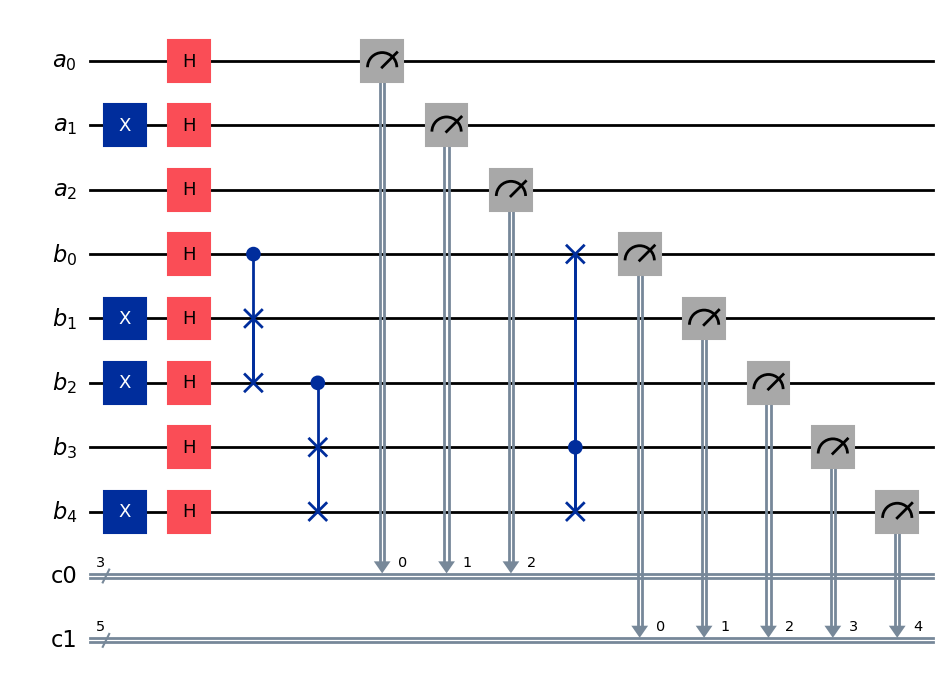

In [25]:
# Draw the circuit without barriers
circuit.draw(output="mpl", plot_barriers=False)

In [27]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
 
# Create a Bell state for demonstration
qc = QuantumCircuit(2)
qc.h(0)
qc.crx(pi / 2, 0, 1)
psi = Statevector(qc)

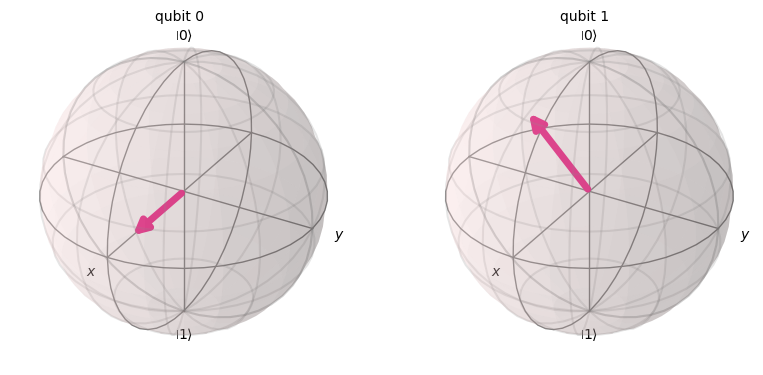

In [34]:
from qiskit.visualization import plot_bloch_multivector
 
plot_bloch_multivector(psi)
# Alternative: psi.draw("bloch")

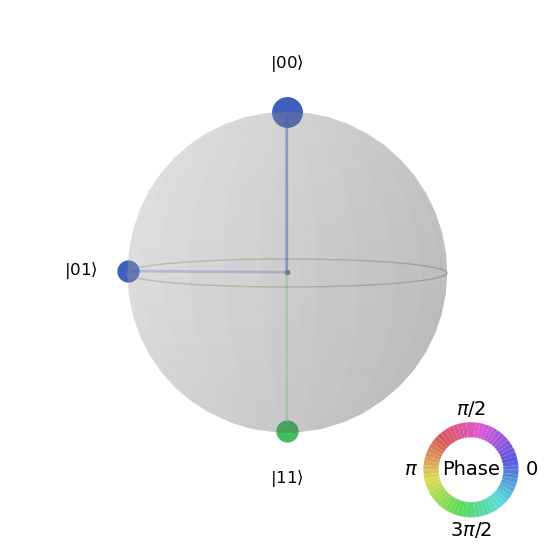

In [36]:
from qiskit.visualization import plot_state_qsphere
 
plot_state_qsphere(psi)
# Alternative: psi.draw("qsphere")

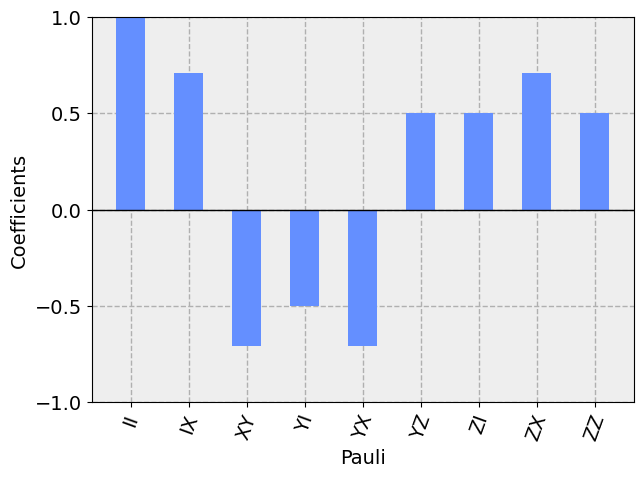

In [38]:
from qiskit.visualization import plot_state_paulivec
 
plot_state_paulivec(psi)
# Alternative: psi.draw("paulivec")

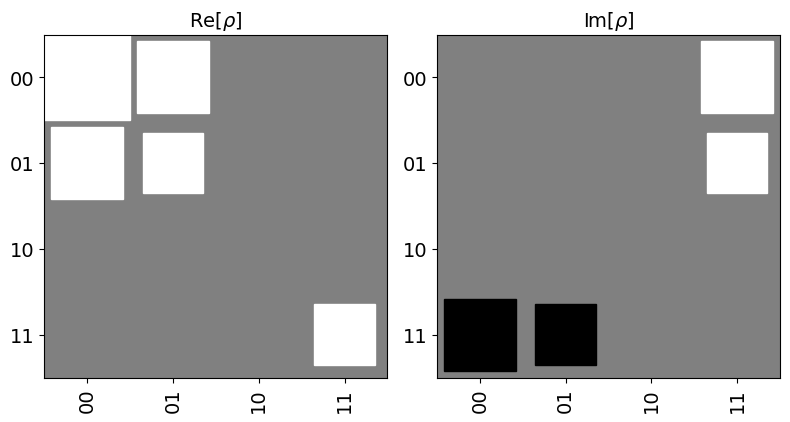

In [40]:
from qiskit.visualization import plot_state_hinton
 
plot_state_hinton(psi)
# Alternative: psi.draw("hinton")

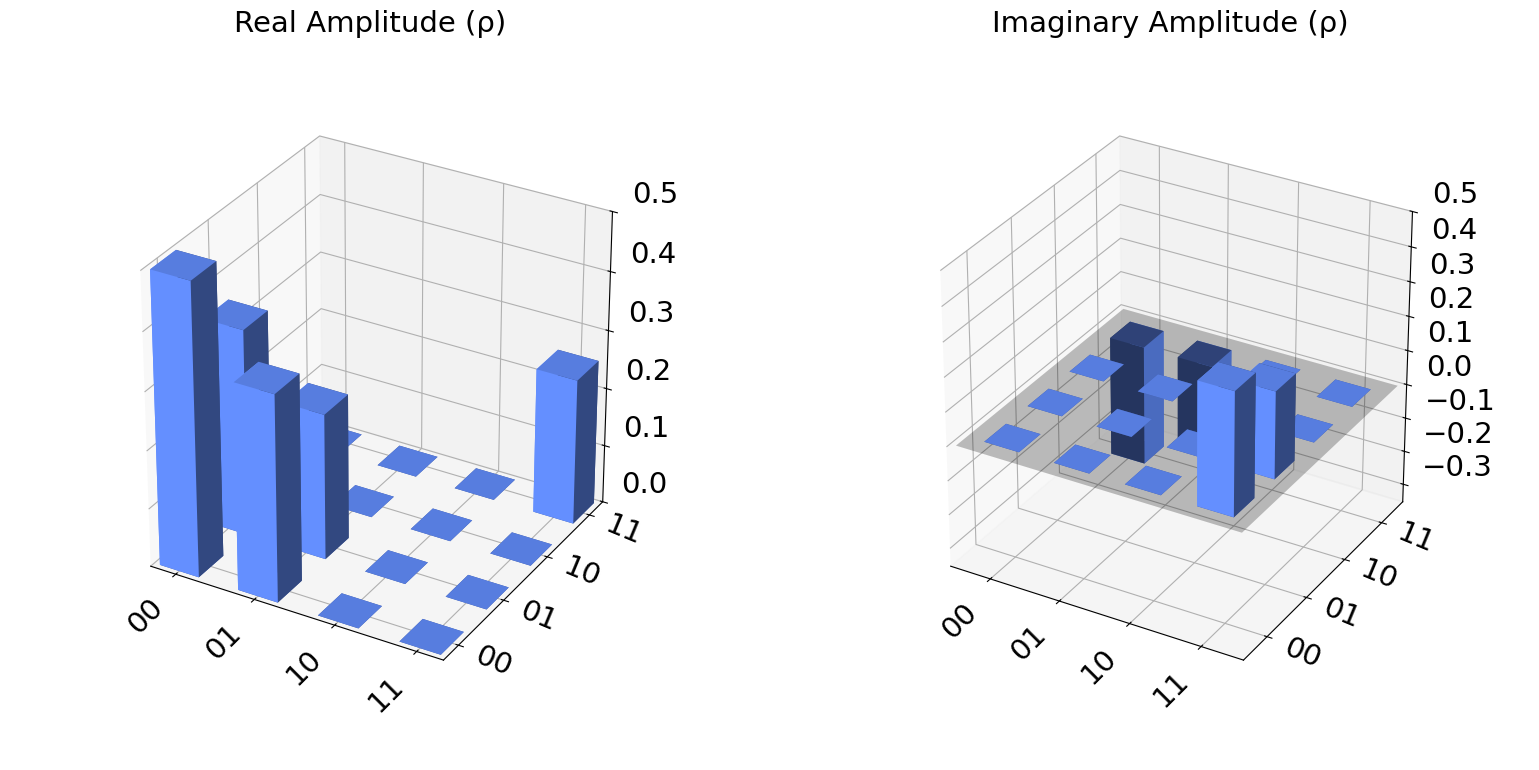

In [42]:
from qiskit.visualization import plot_state_city
 
plot_state_city(psi)
# Alternative: psi.draw("city")

In [44]:
psi.draw("latex")  # psi is a Statevector object

<IPython.core.display.Latex object>

In [46]:
from qiskit.quantum_info import DensityMatrix
 
DensityMatrix(psi).draw("latex")  # convert to a DensityMatrix and draw

<IPython.core.display.Latex object>

In [48]:
from qiskit_aer.primitives import Sampler
 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [50]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
 
# execute the quantum circuit
quasi_dists = Sampler().run(bell, shots=1000).result().quasi_dists[0]
print(quasi_dists)

{3: 0.5, 0: 0.5}


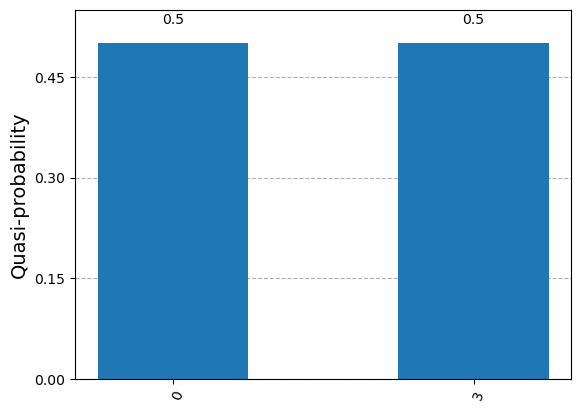

In [52]:
plot_histogram(quasi_dists)

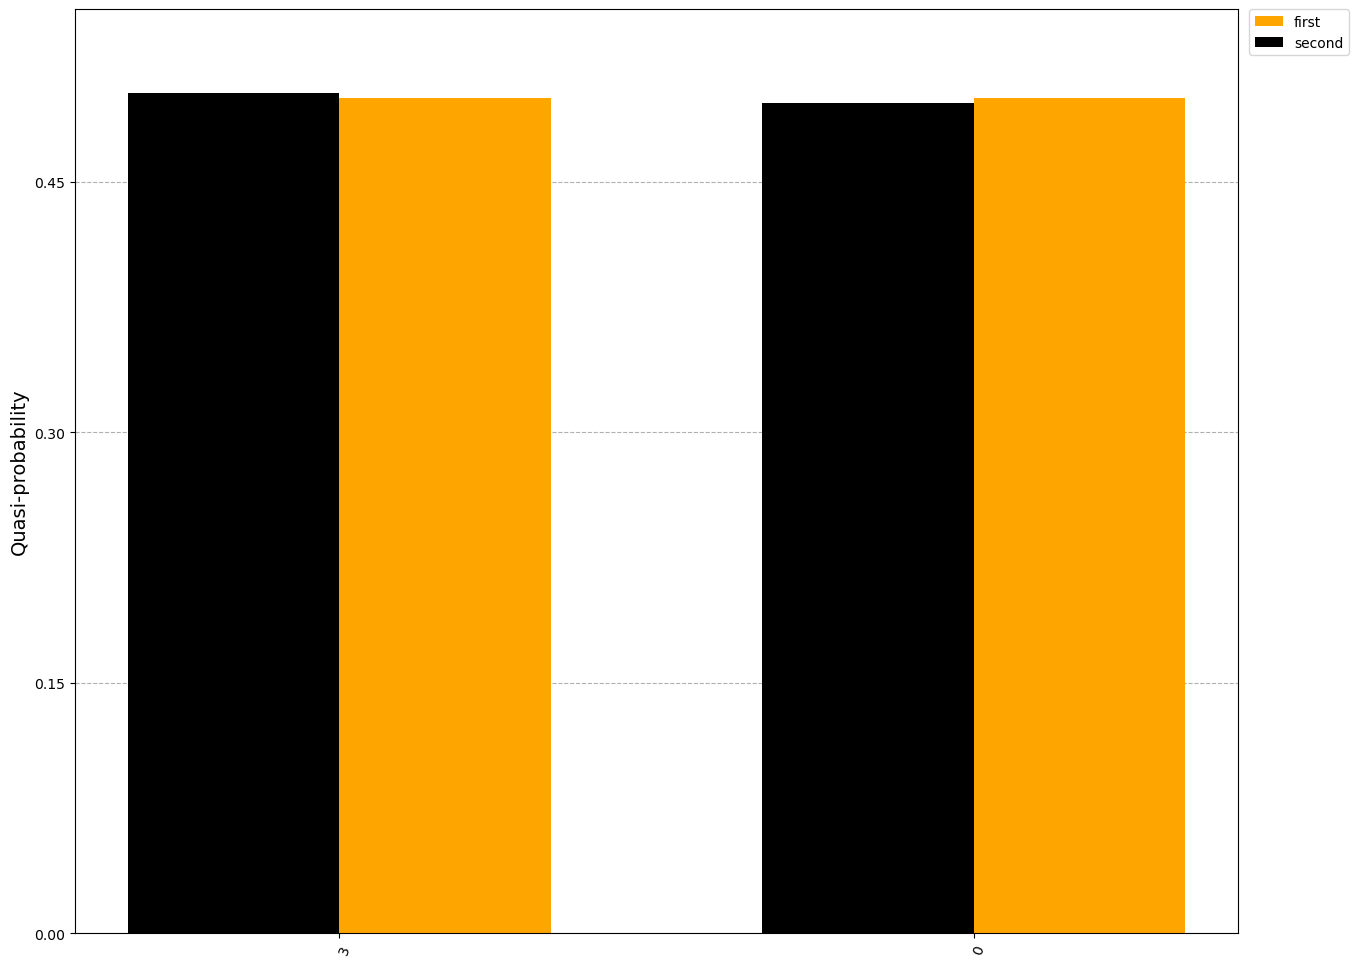

In [54]:
# Execute two-qubit Bell state again
second_quasi_dists = Sampler().run(bell, shots=1000).result().quasi_dists[0]
 
# Plot results with custom options
plot_histogram(
    [quasi_dists, second_quasi_dists],
    legend=["first", "second"],
    sort="desc",
    figsize=(15, 12),
    color=["orange", "black"],
    bar_labels=False,
)

EstimatorResult(values=array([ 0.48242188,  0.0078125 ,  0.52539062, -0.046875  , -0.65039062,
       -0.00195312,  0.70898438]), metadata=[{'shots': 1024, 'variance': 0.7672691345214844, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000154166, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.000777, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'statevector', 'required_memory_mb': 1, 'fusion': {'enabled': True, 'threshold': 14, 'applied': False, 'max_fused_qubits': 5}}]}, {'shots': 1024, 'variance': 0.99993896484375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 7.7167e-05, 'noise': 'ideal', 'batched

<BarContainer object of 7 artists>

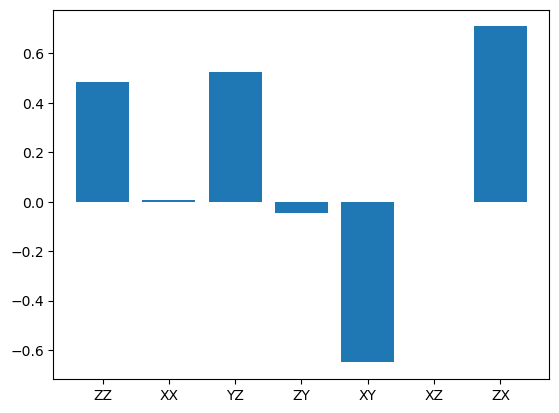

In [56]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator
from matplotlib import pyplot as plt
 
# Simple estimation experiment to create results
qc = QuantumCircuit(2)
qc.h(0)
qc.crx(1.5, 0, 1)
 
observables_labels = ["ZZ", "XX", "YZ", "ZY", "XY", "XZ", "ZX"]
observables = [SparsePauliOp(label) for label in observables_labels]
 
result = Estimator().run([qc] * 7, observables).result()
print(result)
 
# Plot using Matplotlib
plt.bar(observables_labels, result.values)

Text(0.5, 1.0, 'Expectation values (with standard errors)')

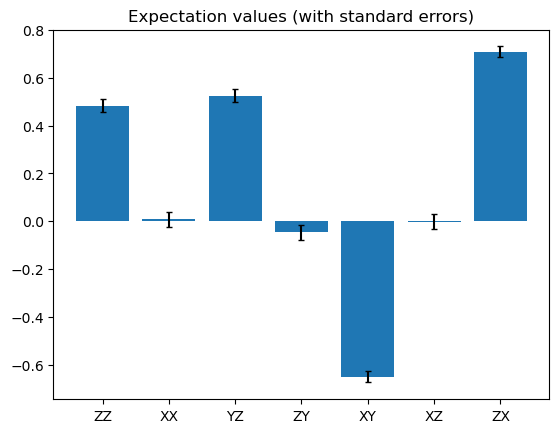

In [58]:
from math import sqrt
 
standard_error = [
    sqrt(exp_data["variance"]) / sqrt(exp_data["shots"])
    for exp_data in result.metadata
]
 
_, ax = plt.subplots()
ax.bar(observables_labels, result.values, yerr=standard_error, capsize=2)
ax.set_title("Expectation values (with standard errors)")

In [60]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

In [62]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=())]

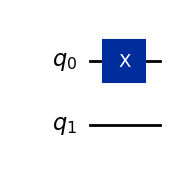

In [64]:
qc.draw("mpl")

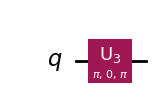

In [66]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw("mpl")

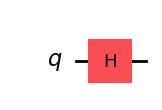

In [68]:
from qiskit.circuit.library import HGate
 
qc = QuantumCircuit(1)
qc.append(
    HGate(),  # New HGate instruction
    [0],  # Apply to qubit 0
)
qc.draw("mpl")

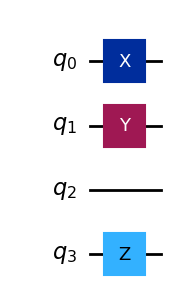

In [70]:
qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)
 
# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")

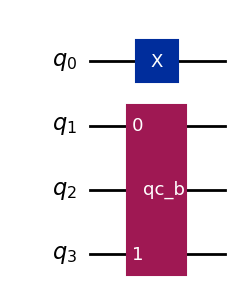

In [72]:
inst = qc_b.to_instruction()
qc_a.append(inst, [1, 3])
qc_a.draw("mpl")

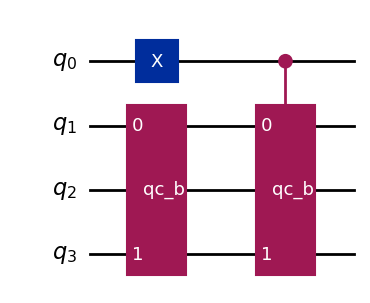

In [74]:
gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 1, 3])
qc_a.draw("mpl")

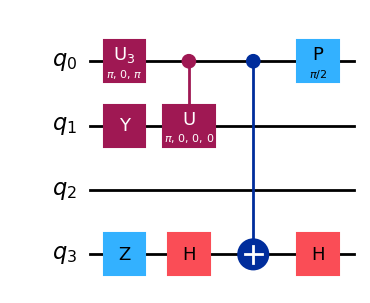

In [76]:
qc_a.decompose().draw("mpl")

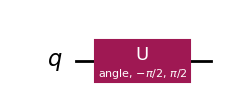

In [78]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit import Parameter
 
angle = Parameter("angle")  # undefined number
 
# Create and optimize circuit once
qc = QuantumCircuit(1)
qc.rx(angle, 0)
qc = generate_preset_pass_manager(
    optimization_level=3, basis_gates=["u", "cx"]
).run(qc)
 
qc.draw("mpl")

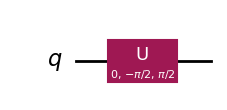

In [80]:
circuits = []
for value in range(100):
    circuits.append(qc.assign_parameters({angle: value}))
 
circuits[0].draw("mpl")

In [82]:
qc.parameters

ParameterView([Parameter(angle)])

In [92]:
# pylint: disable=invalid-name
import matplotlib.pyplot as plt
import numpy as np
from qiskit import*

from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")


Imports Successful
